# Seaborn PairGrid

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Basics

In [4]:
sns.set_style('darkgrid')

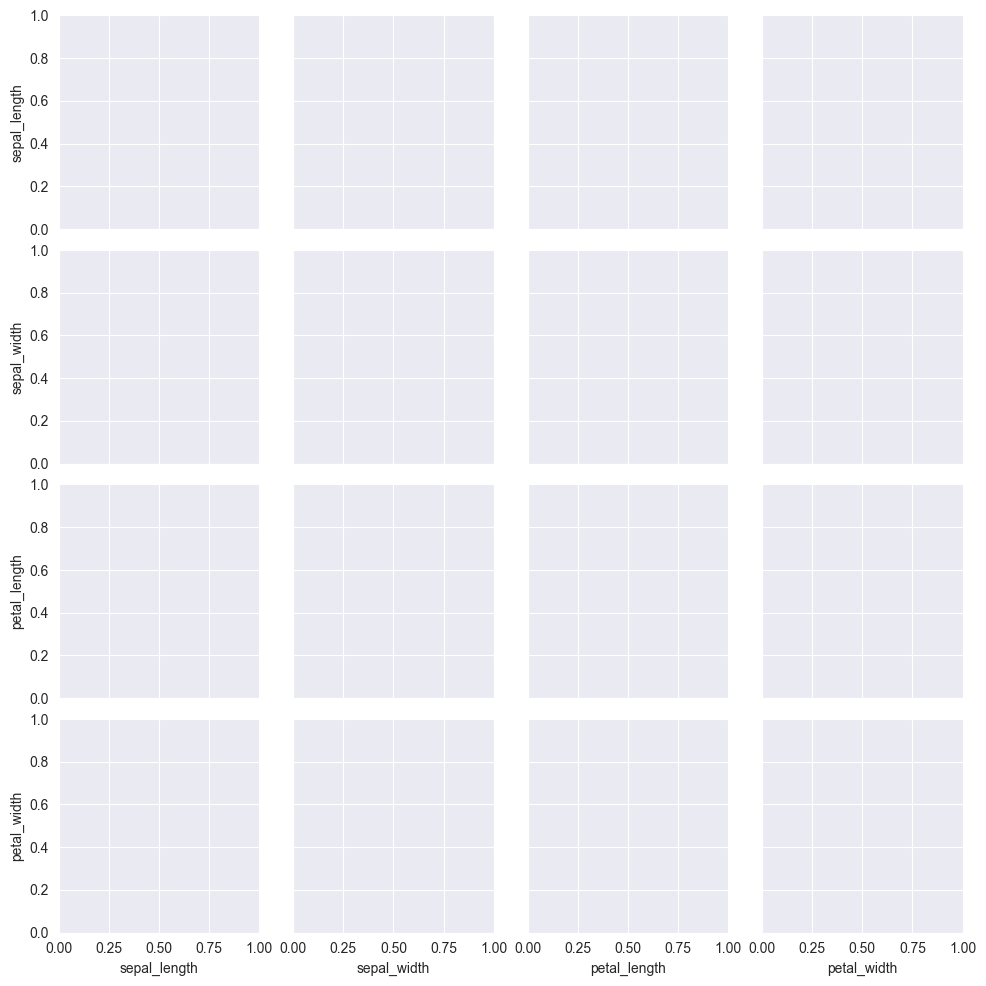

In [5]:
g = sns.PairGrid(iris)

In [6]:
type(g)

seaborn.axisgrid.PairGrid

## `.map()`

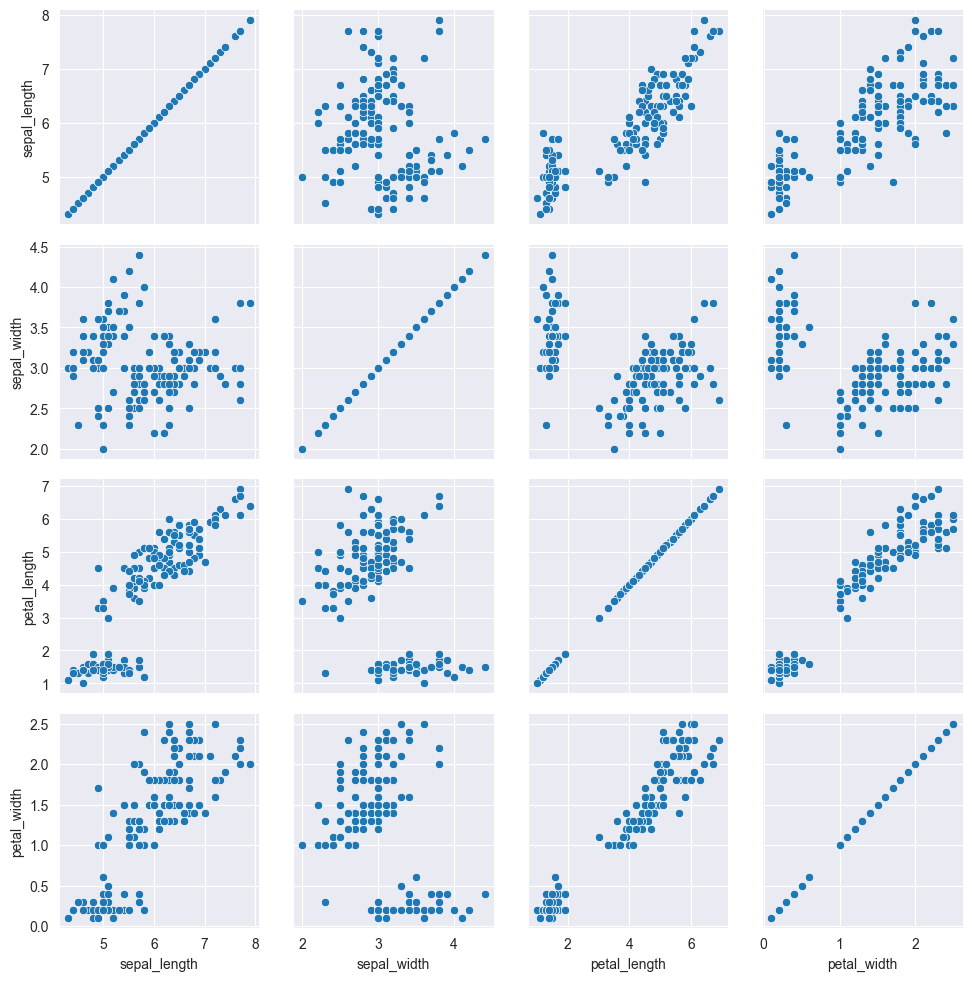

In [7]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

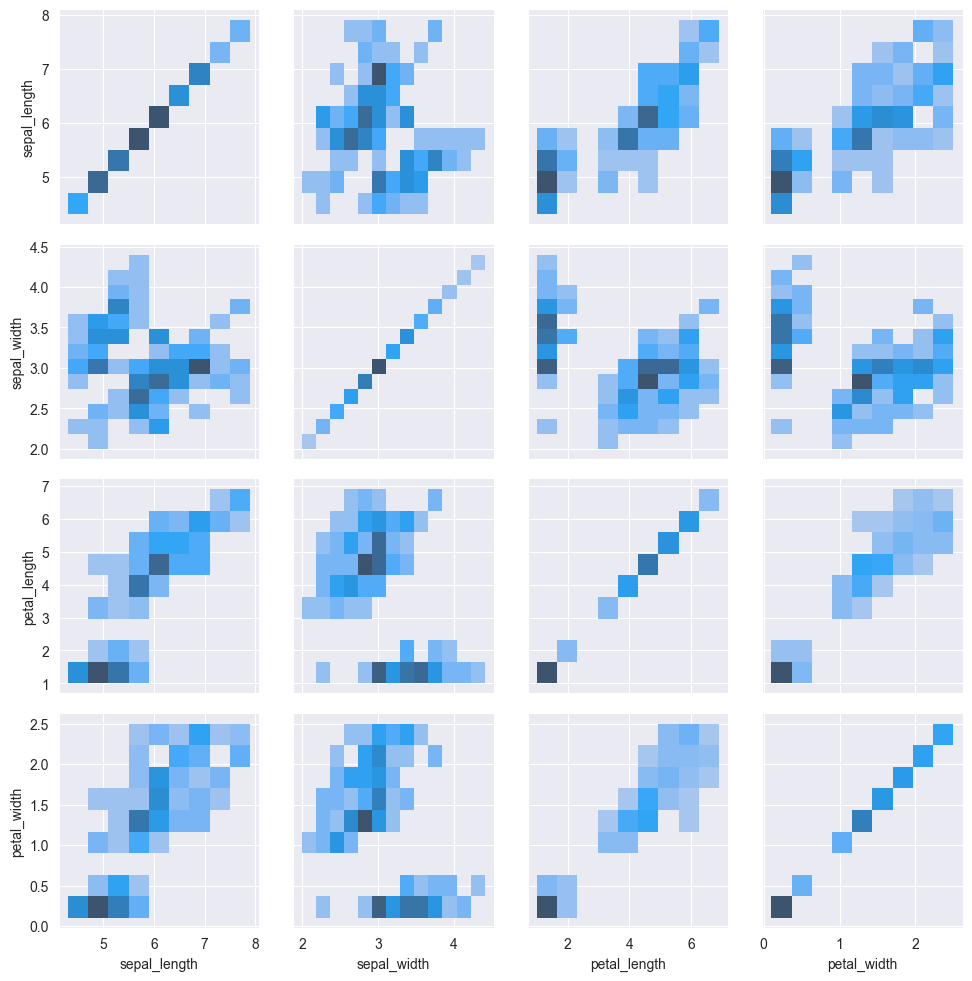

In [8]:
g = sns.PairGrid(iris)
g.map(sns.histplot)

## Matplotlib functions 

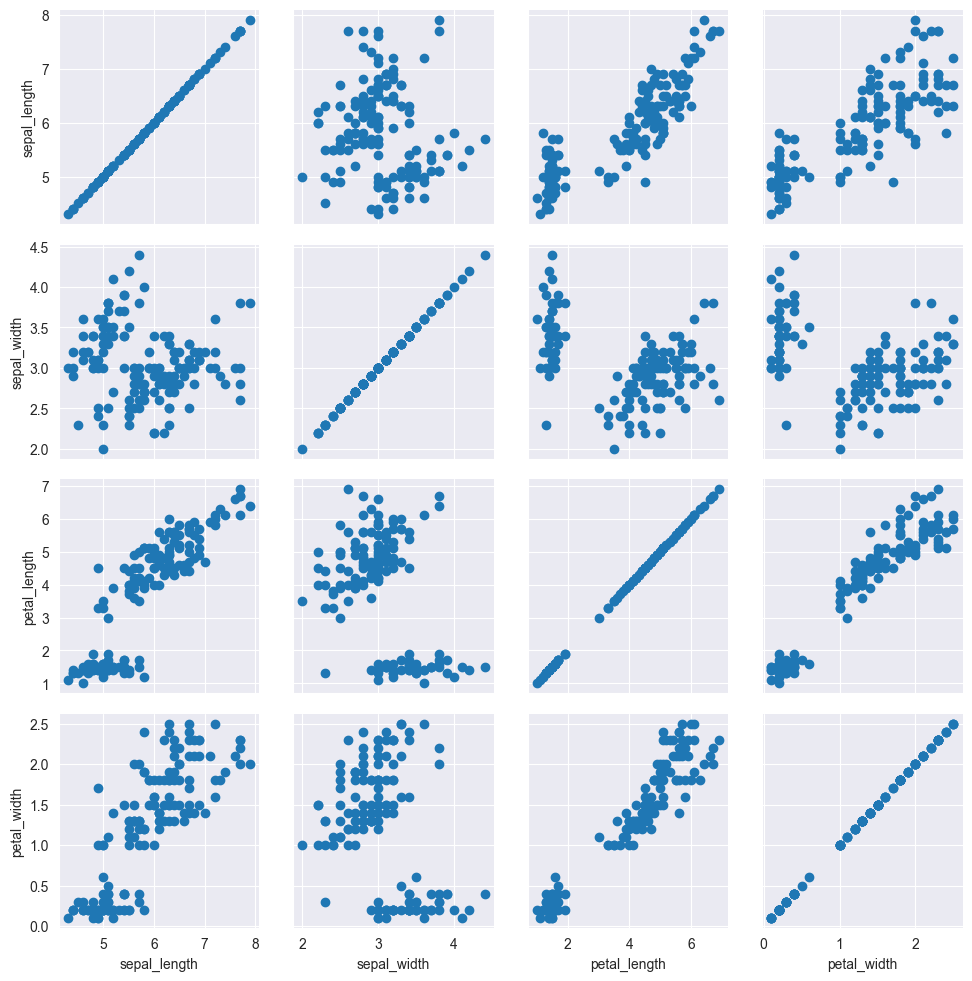

In [9]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

## PairGrid Anatomy

### `.map_diag()` and `.map_offdiag()`

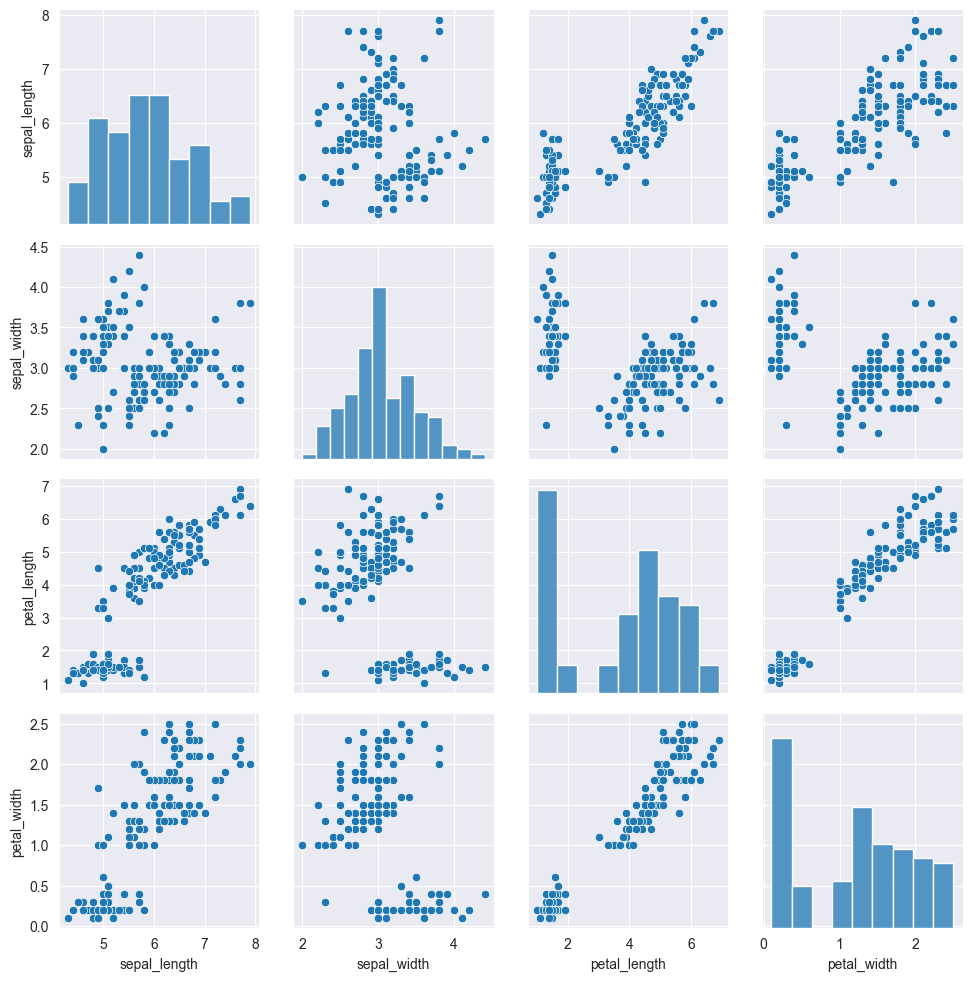

In [10]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)


### `.map_upper()` and `.map_lower()`

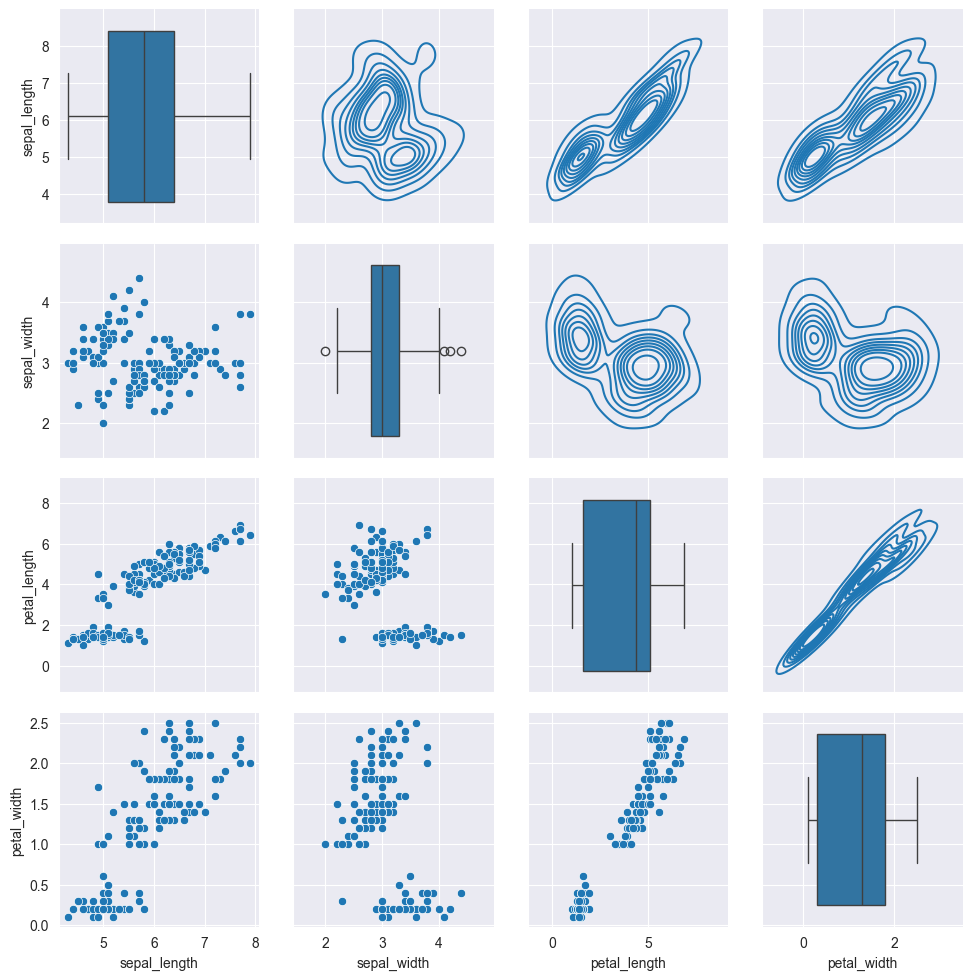

In [11]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot)

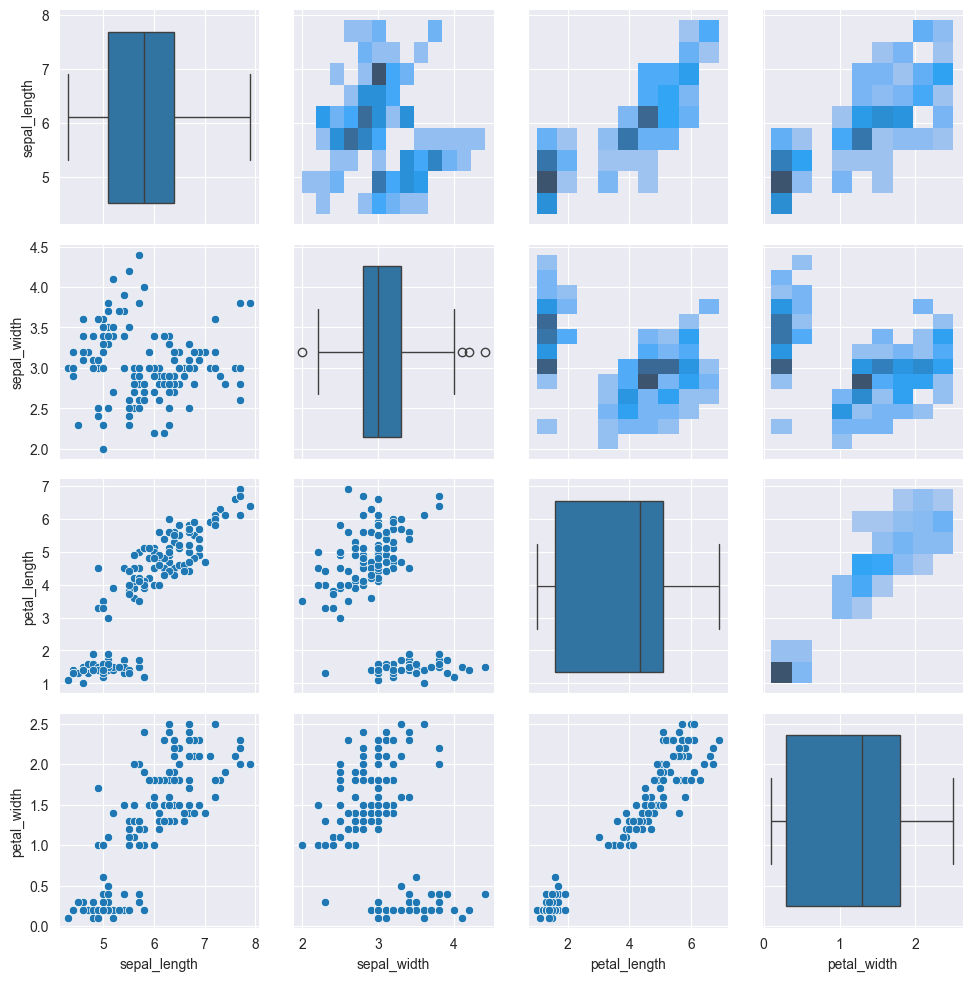

In [14]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot) #Lower Matrix 
g.map_diag(sns.boxplot) #main Diagonal
g.map_upper(sns.histplot) #Upper Matrix 

### `corner`

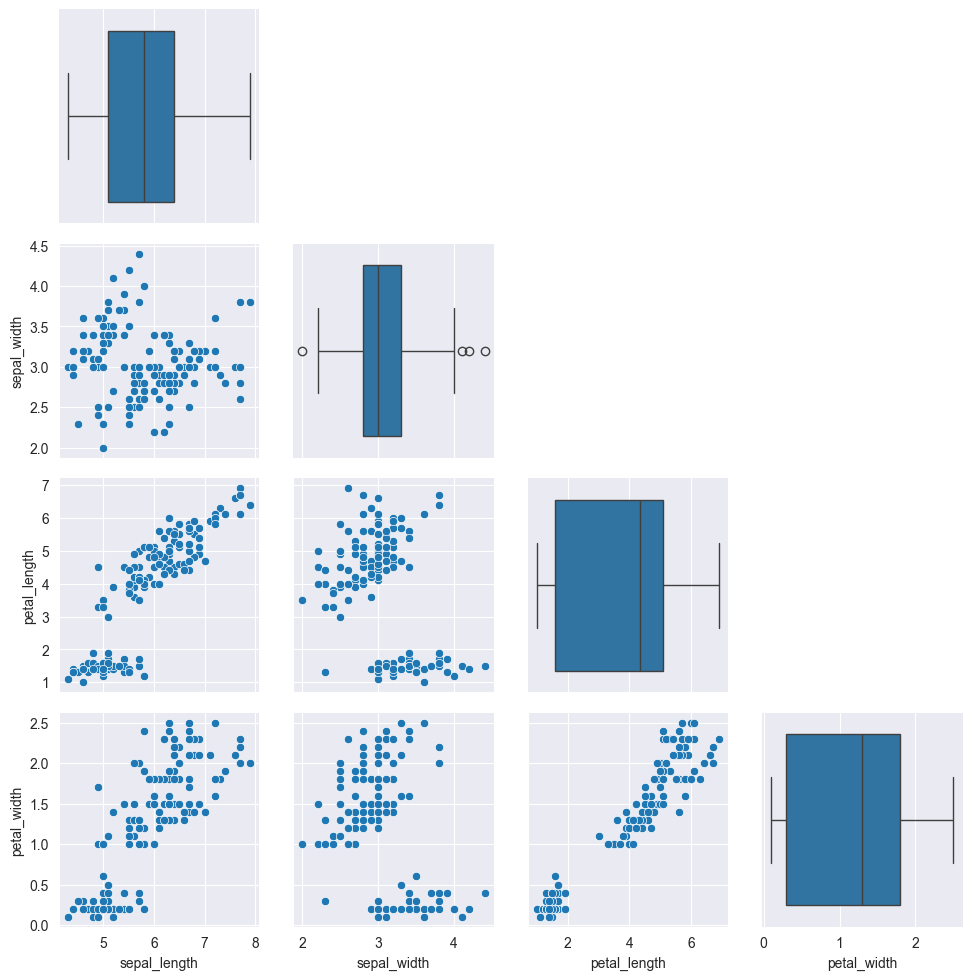

In [15]:
g = sns.PairGrid(iris, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.boxplot)

## Additional Options 

### `hue`

#### drag_sharey
The diag_sharey parameter in seaborn.PairGrid controls whether the y-axis limits of the plots on the diagonal are shared or not. If diag_sharey is True (the default value), the y-axis limits of the diagonal plots are the same as the y-axis limits of the off-diagonal plots in the same row. This can be useful if the diagonal plots show the same kind of distribution as the off-diagonal plots, such as histograms or kernel density estimates. If diag_sharey is False, the y-axis limits of the diagonal plots are adjusted independently based on the data in each plot. 

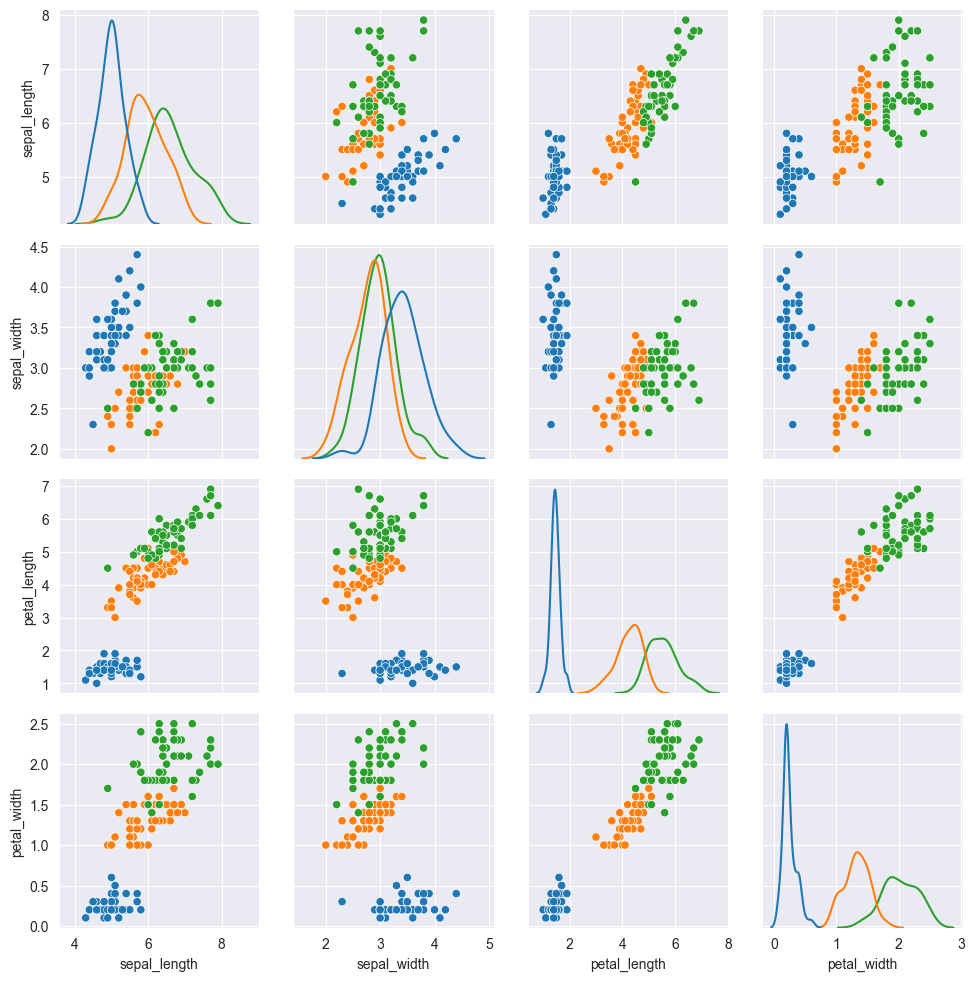

In [16]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

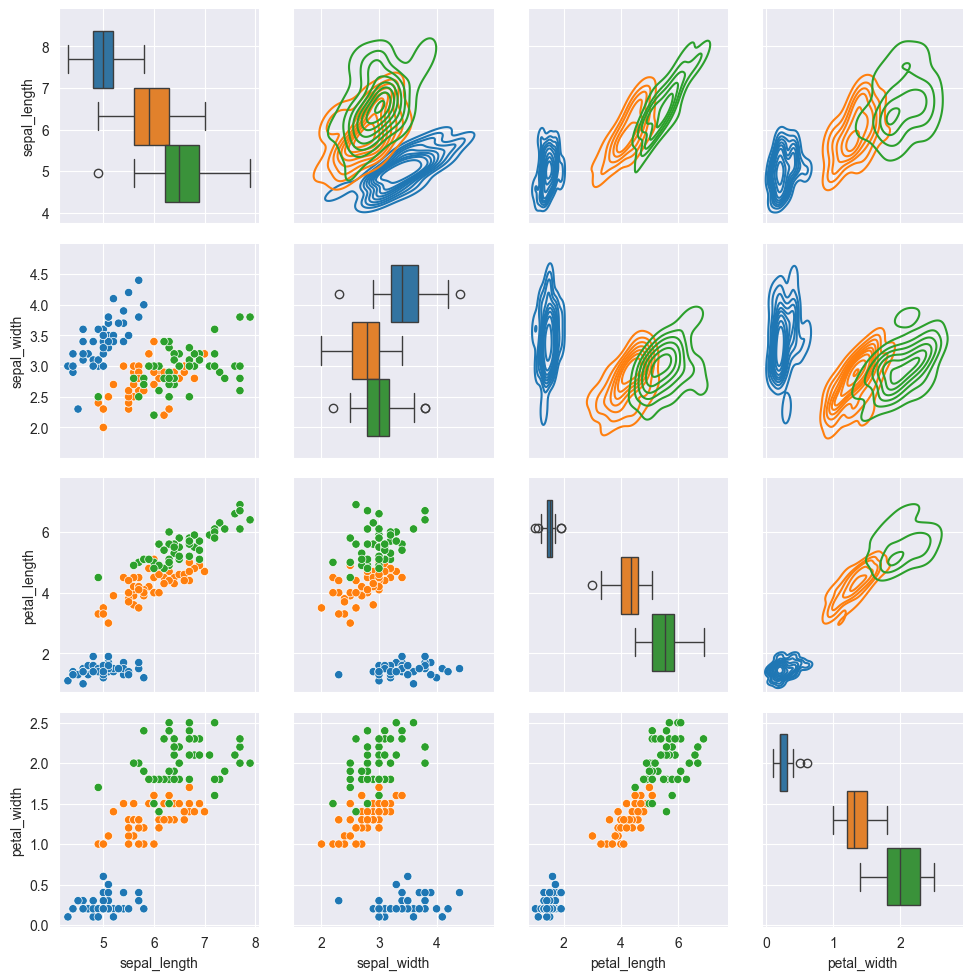

In [17]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_upper(sns.kdeplot)
g.map_diag(sns.boxplot)
g.map_lower(sns.scatterplot)

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### `vars`

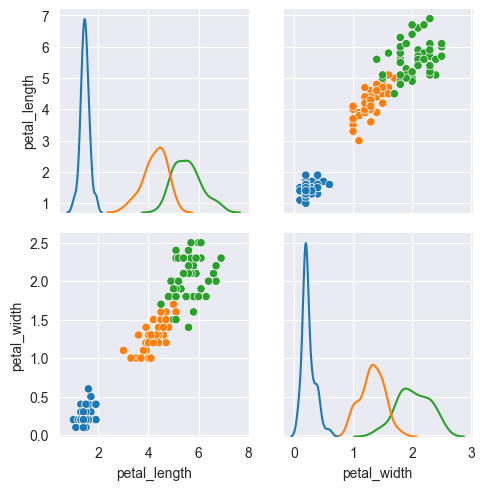

In [20]:
g = sns.PairGrid(iris, hue = 'species',
                 diag_sharey=False, 
                 vars=['petal_length', 'petal_width'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

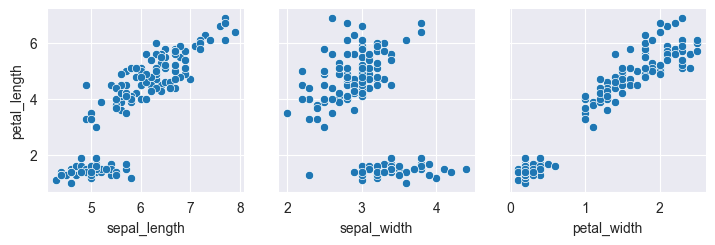

In [21]:
g = sns.PairGrid(iris,  
                 x_vars=['sepal_length', 'sepal_width', 'petal_width'],
                 y_vars=['petal_length']
                )
g.map(sns.scatterplot);

## Styling 

### Plot-specific Keywords

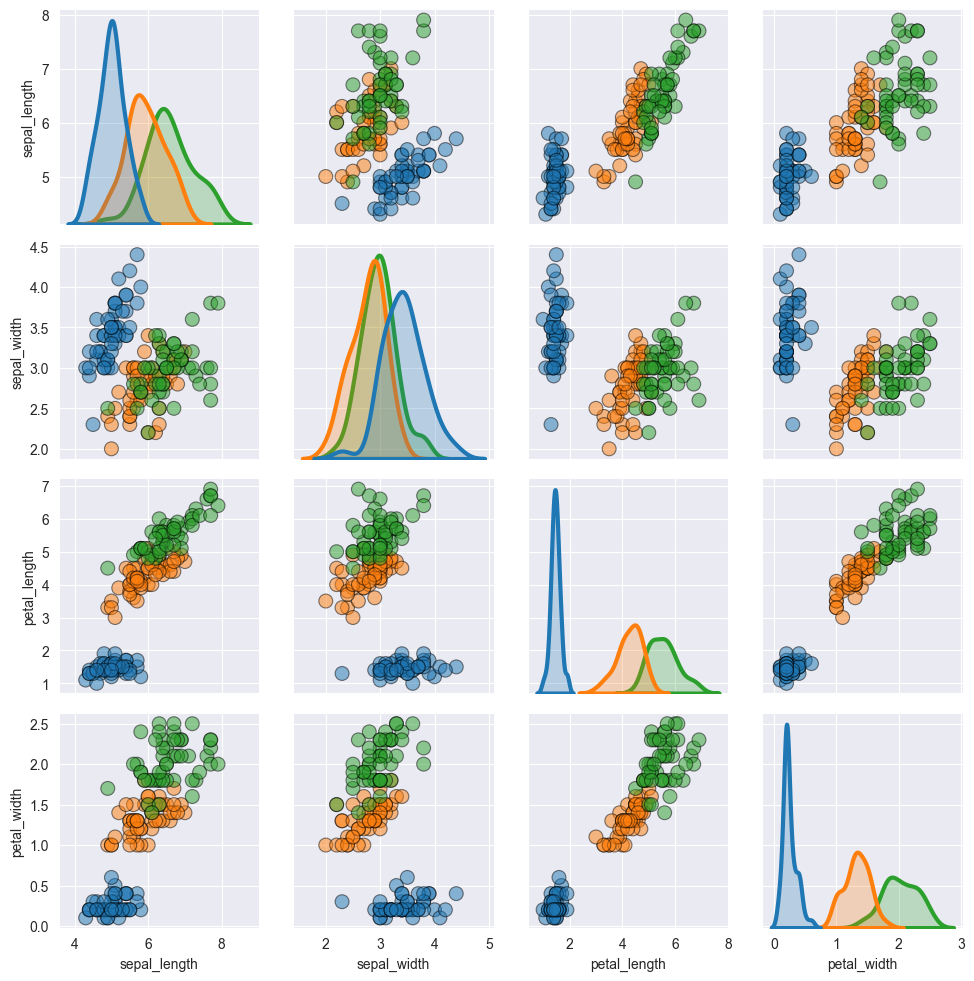

In [22]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True, lw = 3)
g.map_offdiag(sns.scatterplot, s = 100, alpha = 0.5, ec = 'black')

### `height`, `aspect`

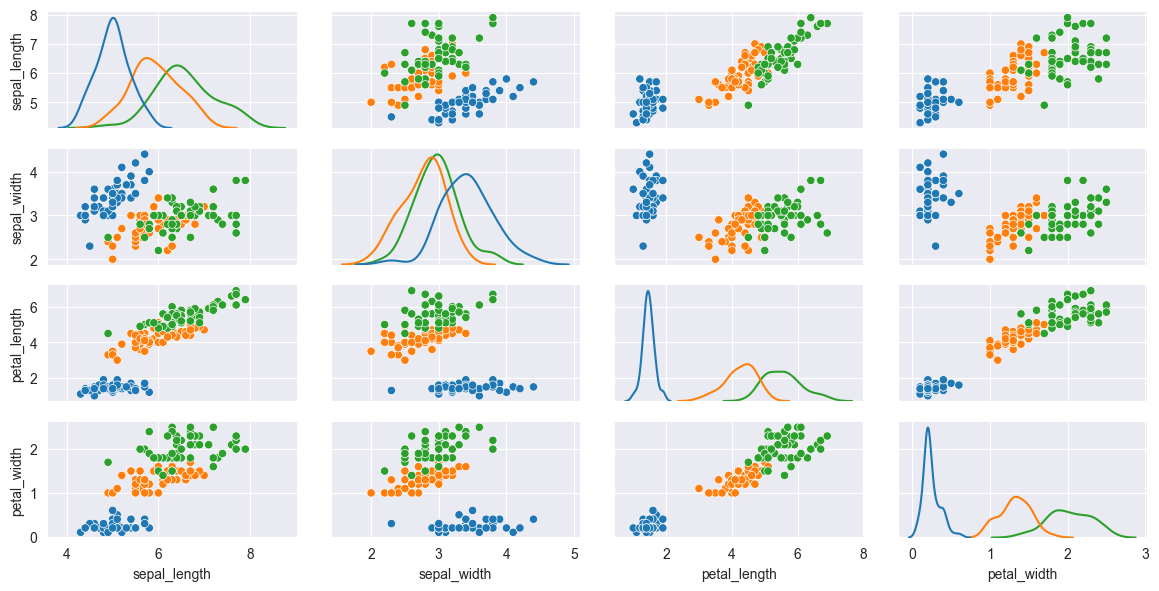

In [23]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, height=1.5, aspect=2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

### `palette`

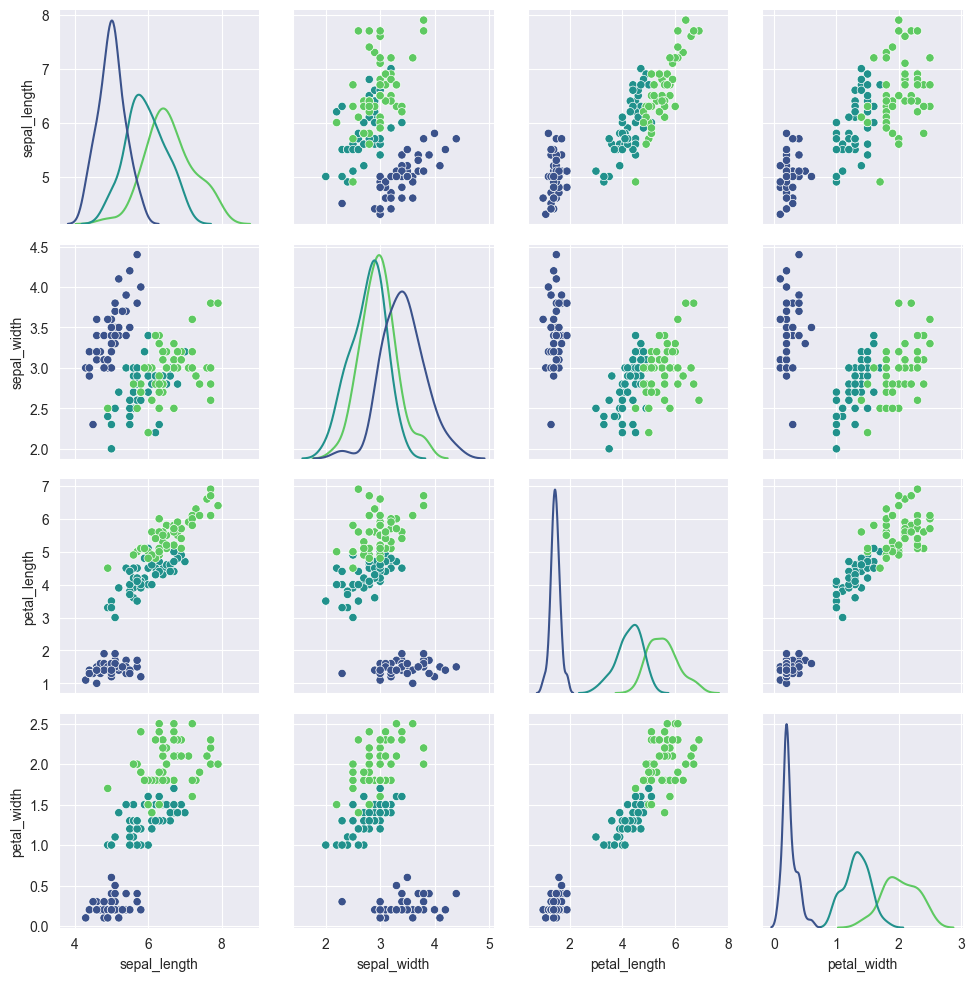

In [24]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

### `.add_legend()`

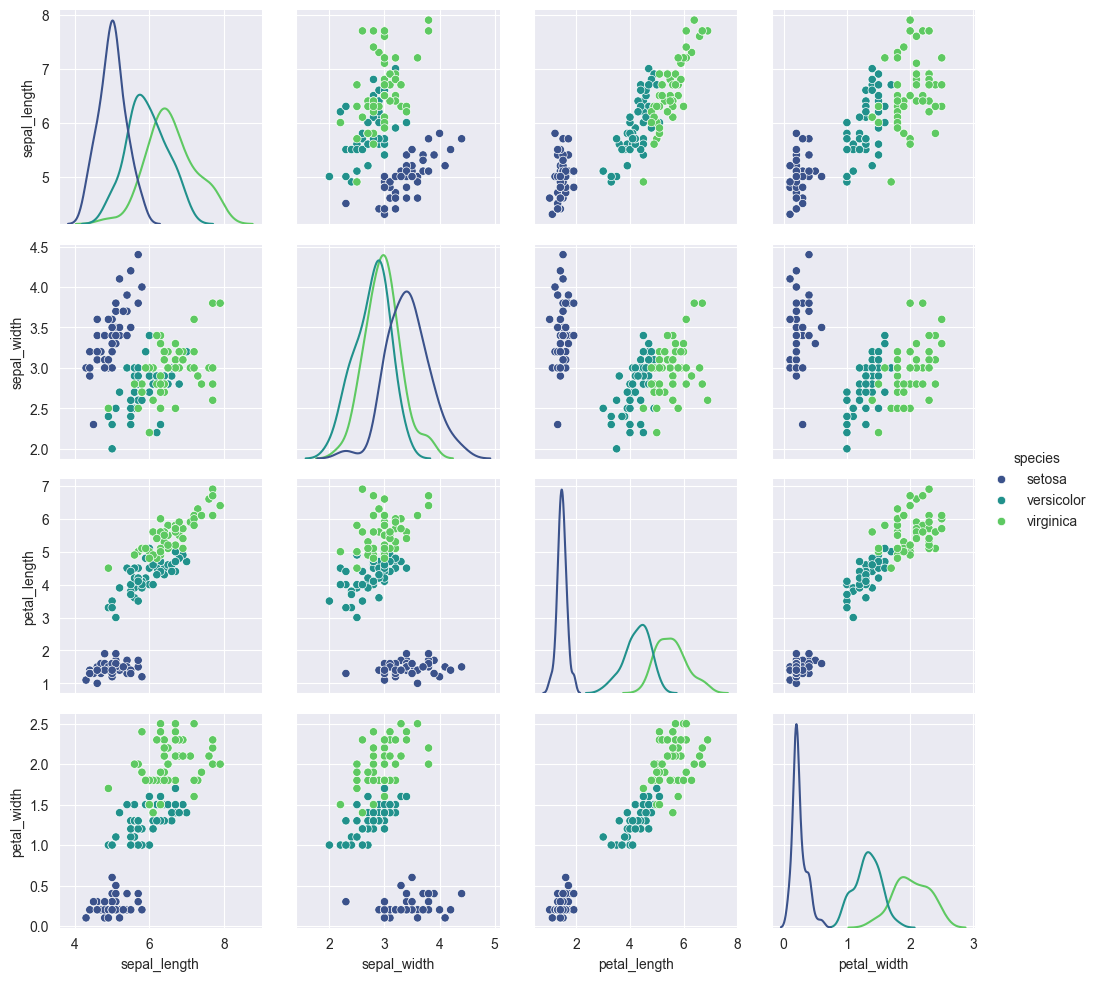

In [25]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

In [26]:
g.palette

[(0.229739, 0.322361, 0.545706),
 (0.127568, 0.566949, 0.550556),
 (0.369214, 0.788888, 0.382914)]

In [27]:
g.palette    #g. + TAB shows you methods and properties of the PairGrid

[(0.229739, 0.322361, 0.545706),
 (0.127568, 0.566949, 0.550556),
 (0.369214, 0.788888, 0.382914)]

## Thumbnail and Overlays

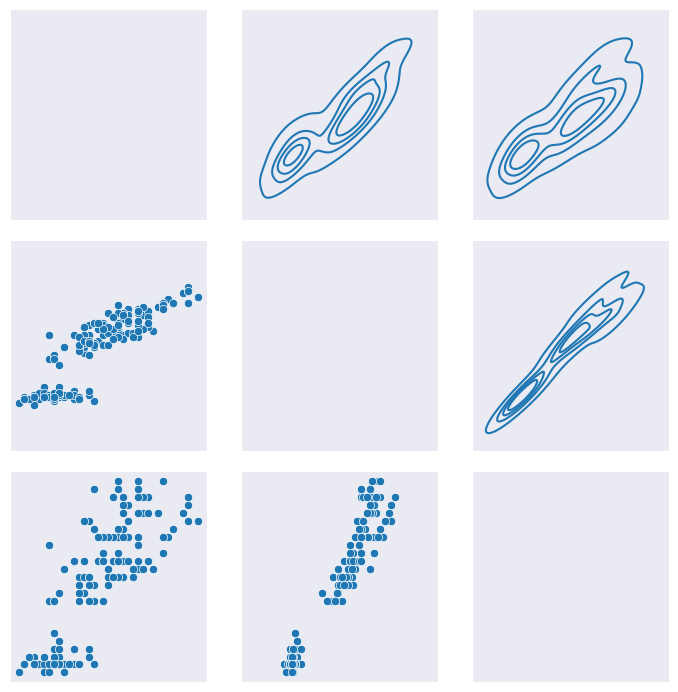

In [28]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_blank.png', dpi=200)
#g.savefig('23pairgrid_image_maindiag.png', dpi=200)
#g.savefig('23pairgrid_image_offdiag.png', dpi=200)
#g.savefig('23pairgrid_image_differentdiag.png', dpi=200)

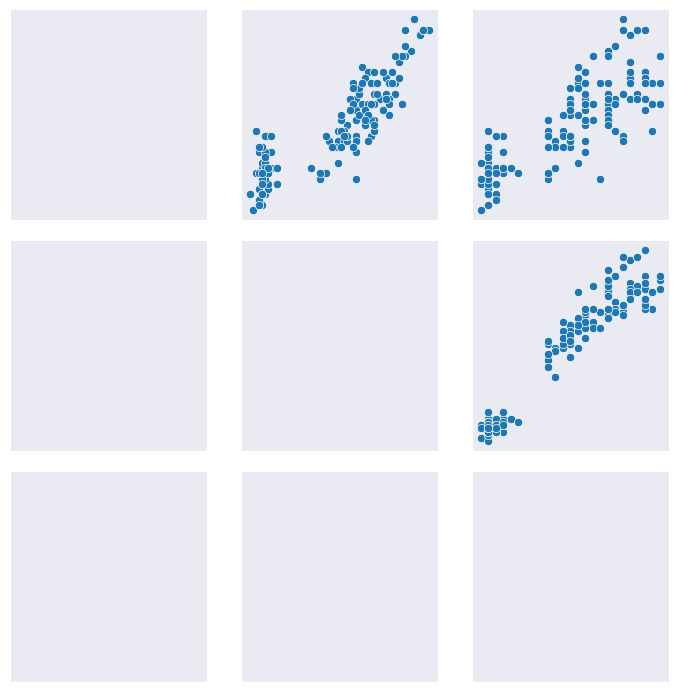

In [29]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_lowertri.png', dpi=200)
#g.savefig('23pairgrid_image_uppertri.png', dpi=200)

## Thumbnail

e:\Python\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Python\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Python\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


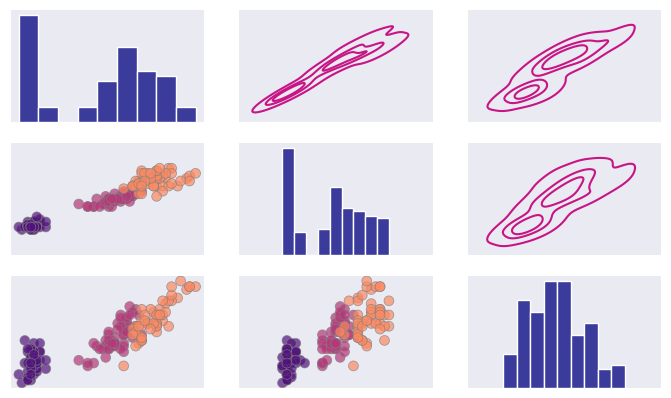

In [30]:
g = sns.PairGrid(iris, 
                 hue='species', 
                 palette='magma', 
                 vars=['petal_length', 'petal_width', 'sepal_length'], 
                 height=1.5, 
                 aspect=1.65, 
                 diag_sharey=False
                )
g.map_lower(sns.scatterplot, s=50, alpha=0.7, ec='gray')
g.map_diag(sns.histplot,hue=None, color='navy')
g.map_upper(sns.kdeplot, n_levels=4,hue=None, color='mediumvioletred')
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_thumb.png', dpi=200);